In [1]:
import pandas as pd
from matplotlib import pyplot as plt

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
non_fbmc_countries = ['CH', 'GB', 'ES', 'IT_NORD']

forecast_legend = [
    'IO_{L1}', 
    'IO_{L1} + IO_{d}', 
    'IO_{L2}', 
    'IO_{L2} + IO_{d}',
]

In [7]:
df_observed = pd.read_excel("./data/day_ahead_prices.xlsx", index_col=0)
df_observed_non_fbmc = pd.read_excel("./data/day_ahead_prices_non_fbmc.xlsx", index_col=0)

# November
start_date_nov = pd.Timestamp('20221101')
end_date_nov = pd.Timestamp('20221201')

# February
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230301')

df_observed_november = df_observed.loc[(df_observed.index > start_date_nov) & (df_observed.index <= end_date_nov)]
df_observed_non_fbmc_november = df_observed_non_fbmc.loc[(df_observed_non_fbmc.index > start_date_nov) & (df_observed_non_fbmc.index <= end_date_nov)]

df_observed_february = df_observed.loc[(df_observed.index > start_date_feb) & (df_observed.index <= end_date_feb)]
df_observed_non_fbmc_february = df_observed_non_fbmc.loc[(df_observed_non_fbmc.index > start_date_feb) & (df_observed_non_fbmc.index <= end_date_feb)]

df_forecasts_november = []
df_forecasts_february = []

df_forecasts_november.append(pd.read_excel("./price_forecasts/price_forecast_norm_1_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("./price_forecasts/price_forecast_norm_1_duality_gap_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("./price_forecasts/price_forecast_norm_2_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("./price_forecasts/price_forecast_norm_2_duality_gap_w_atc_november.xlsx"))

df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_norm_1_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_norm_1_duality_gap_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_norm_2_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_norm_2_duality_gap_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./price_forecasts/volue_day_ahead_ec00.xlsx", index_col=0))

df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_full_norm_1_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("./price_forecasts/price_forecast_full_nuts_norm_1_w_atc_february.xlsx"))

for index, df in enumerate(df_forecasts_november):
    df_forecasts_november[index].index = df_observed_november.index
    
for index, df in enumerate(df_forecasts_february):
    df_forecasts_february[index].index = df_observed_february.index

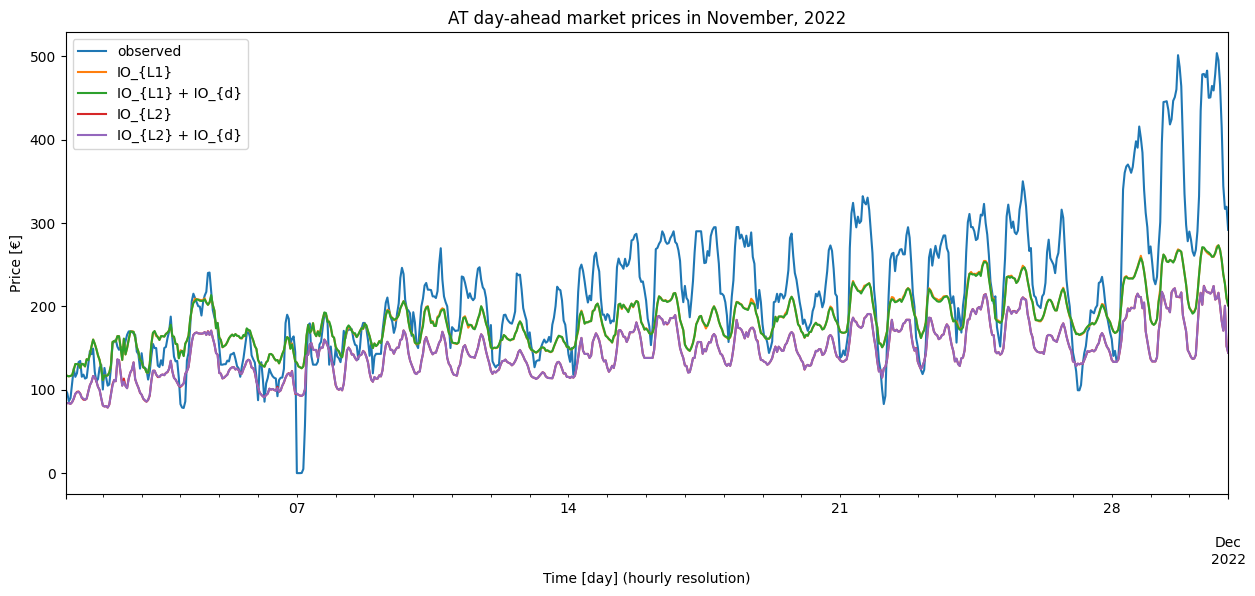

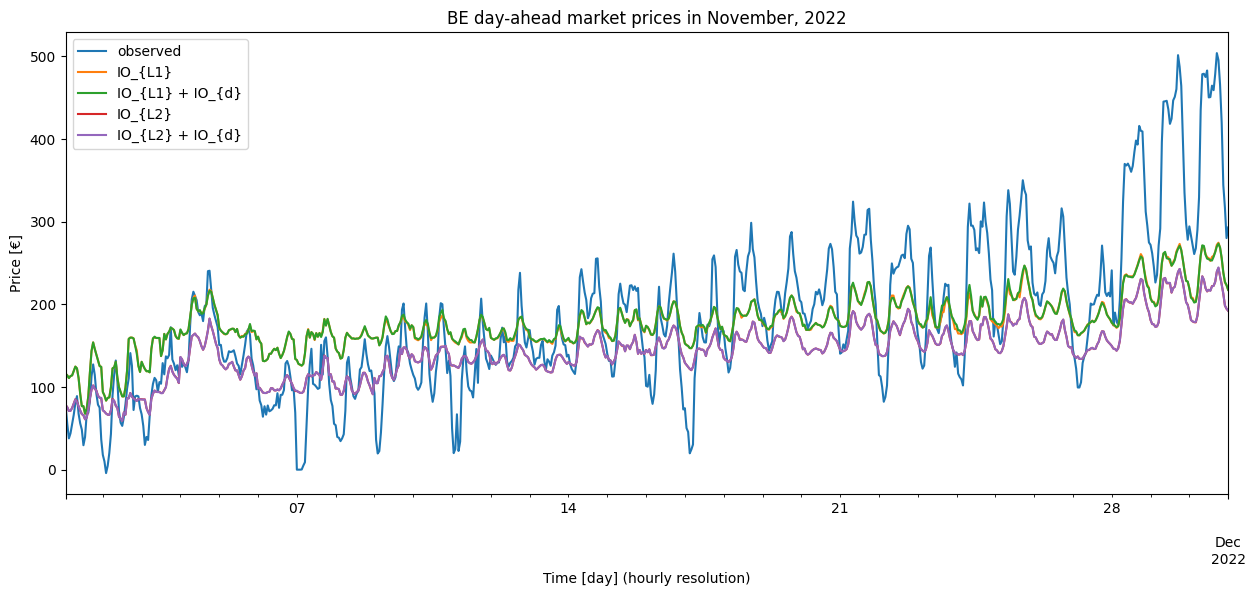

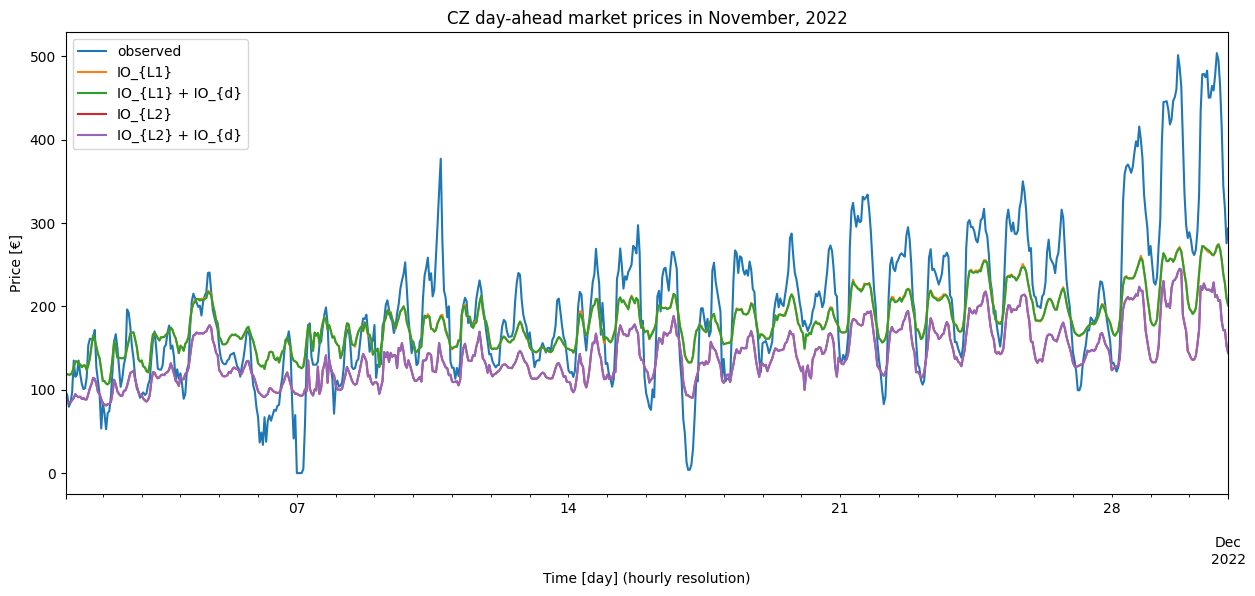

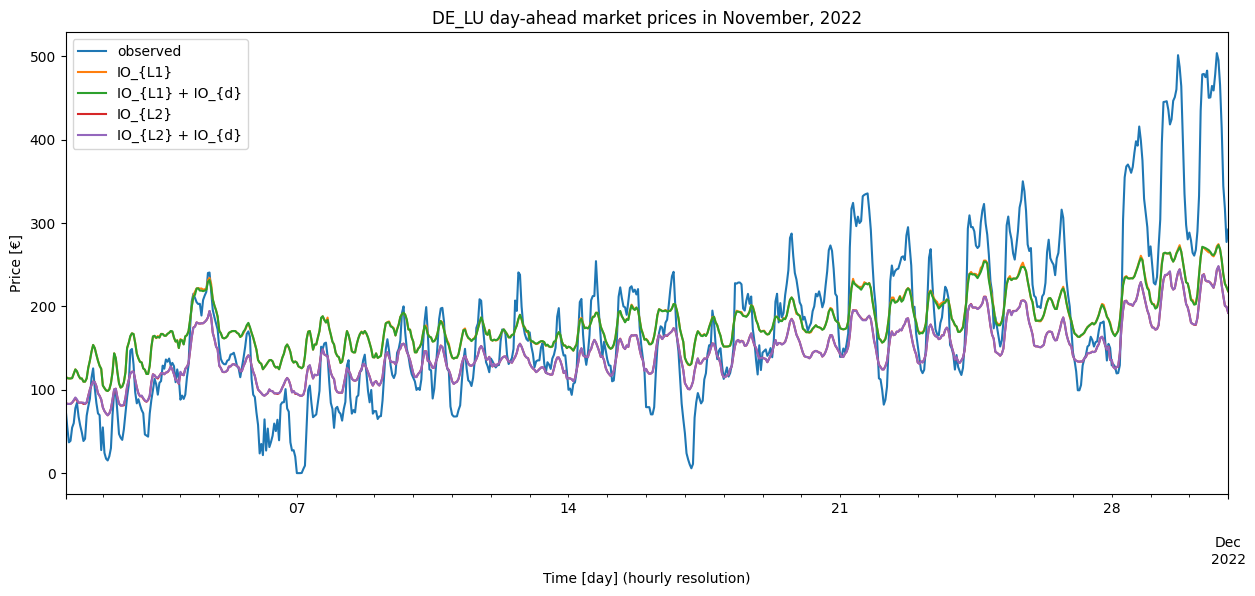

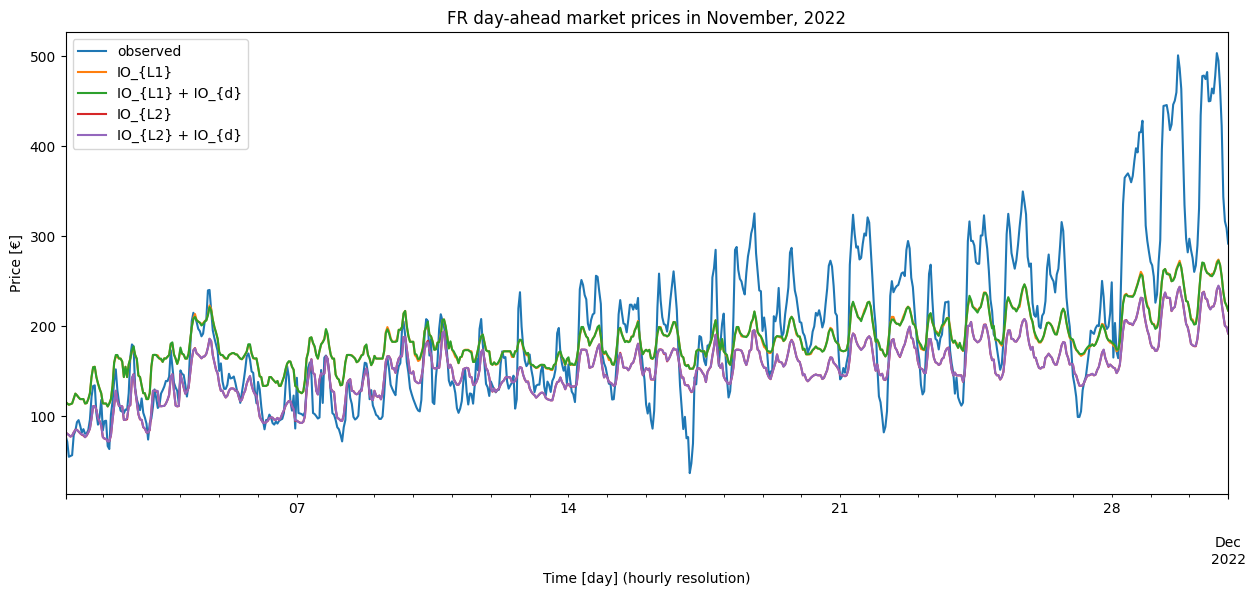

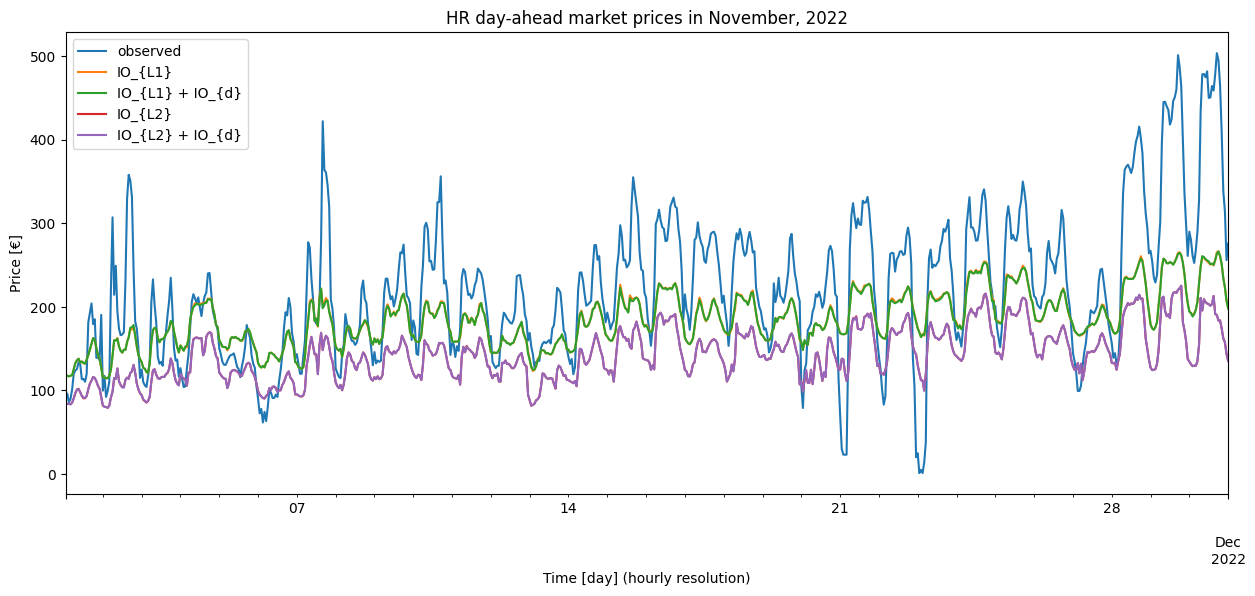

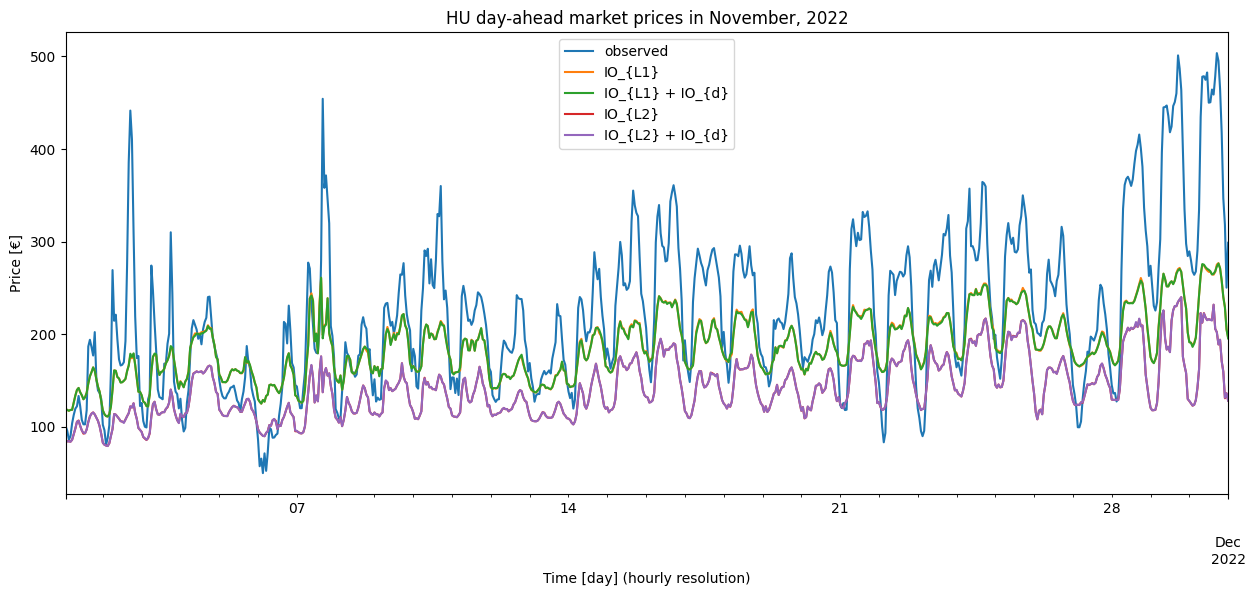

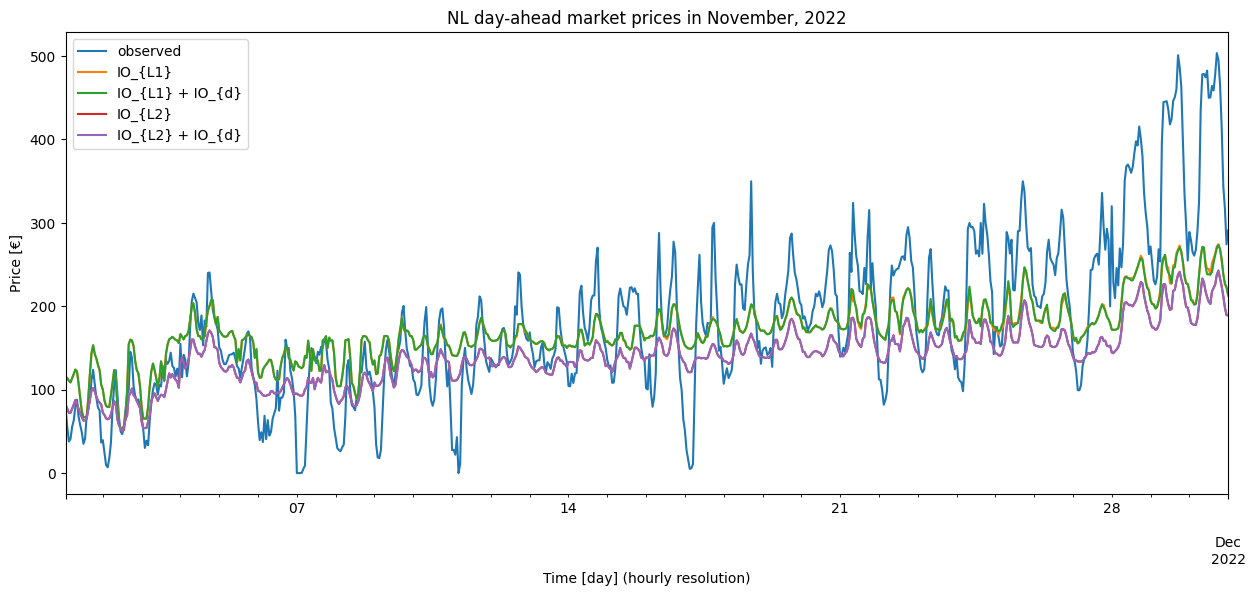

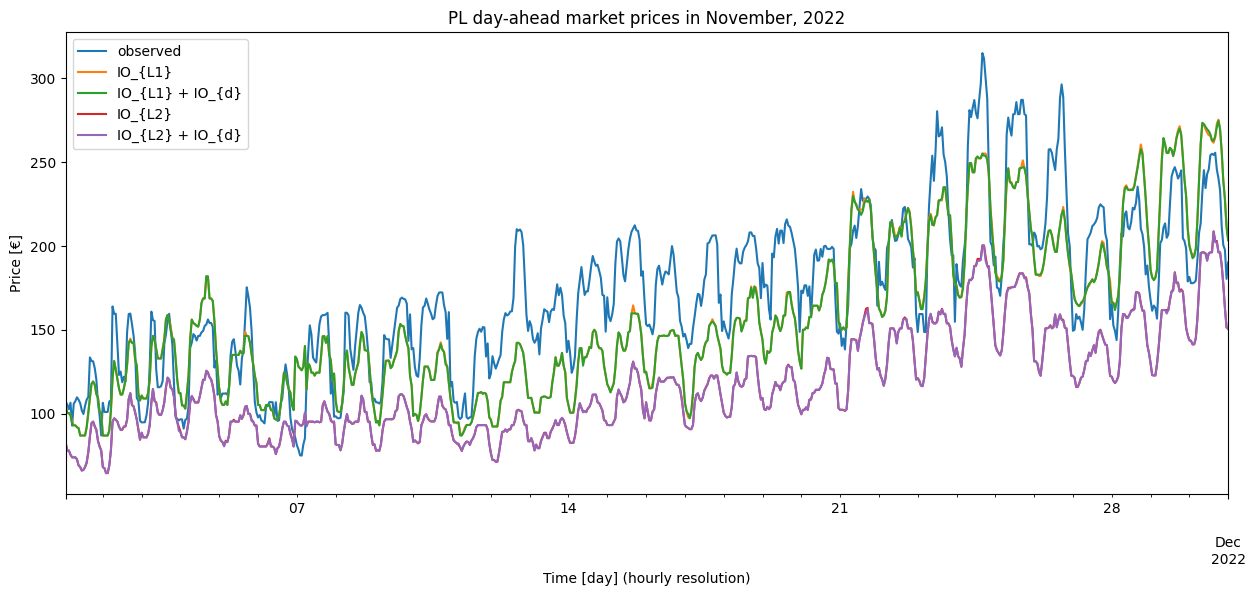

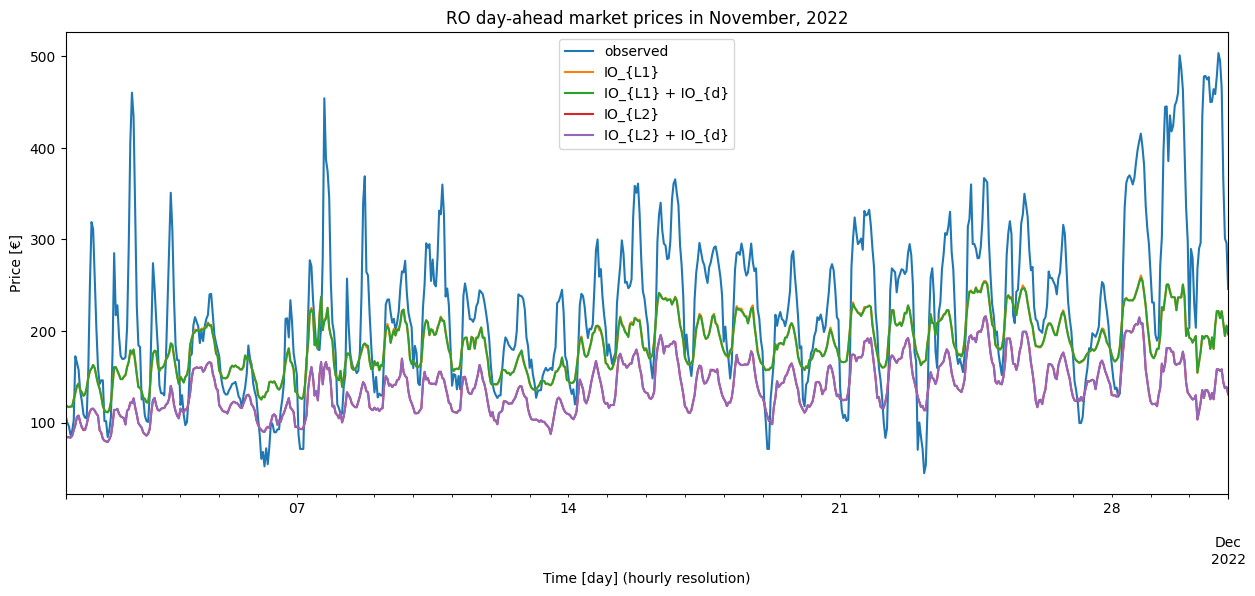

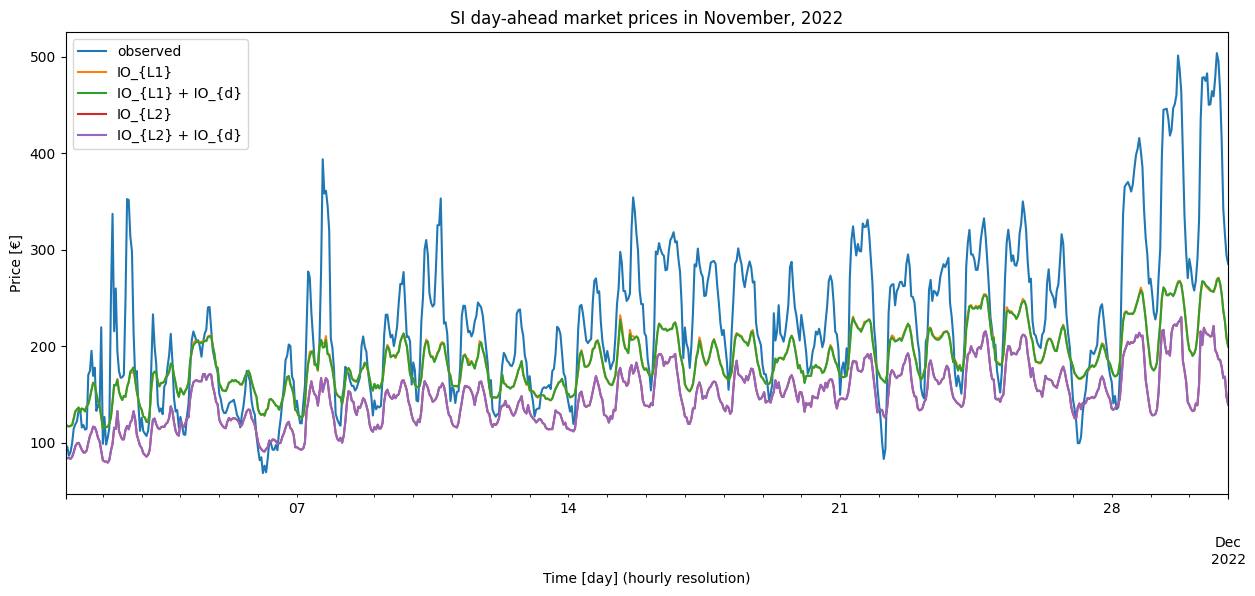

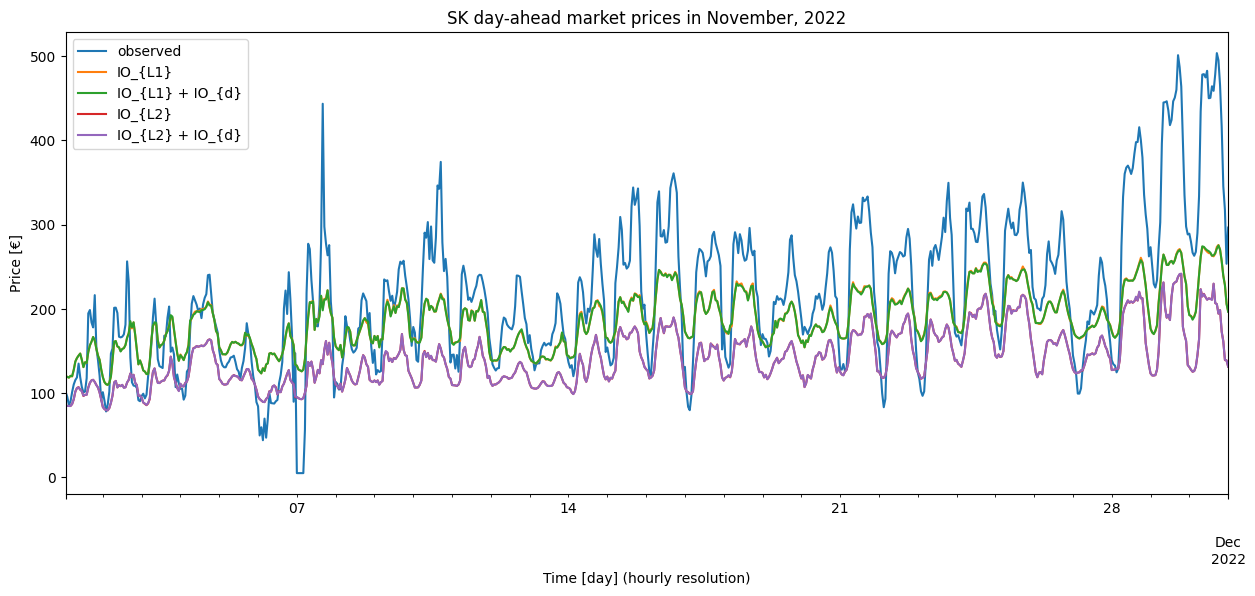

In [39]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_november[zone].plot()
    for df in df_forecasts_november:
        df[zone].plot(ax=ax)
    
    plt.title("{0} day-ahead market prices in November, 2022".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed'] + forecast_legend)
    plt.show()

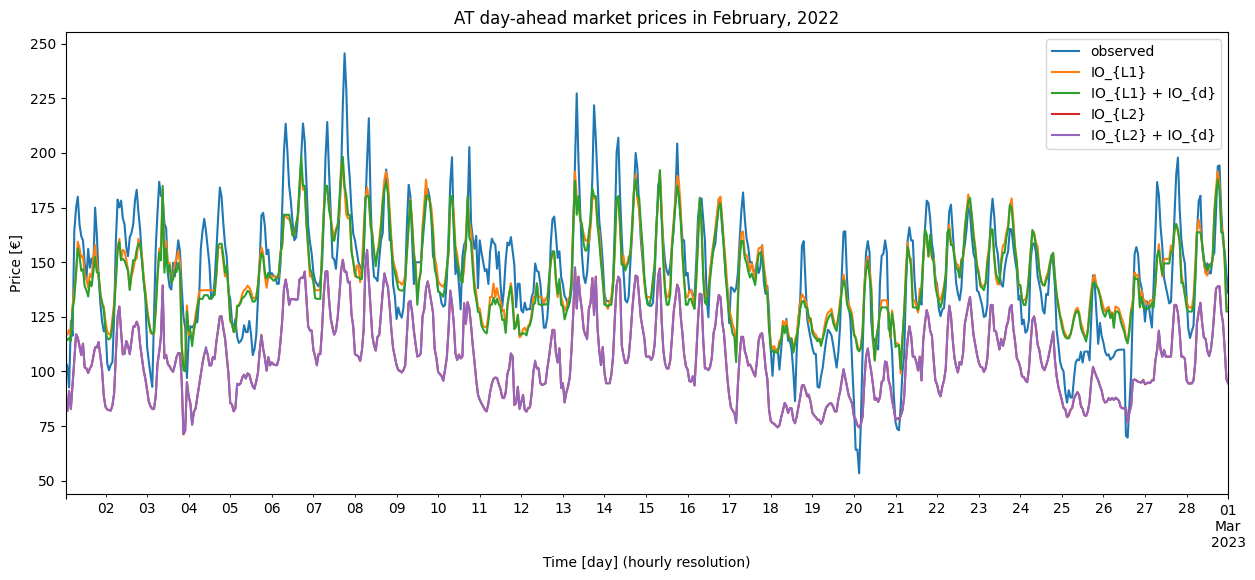

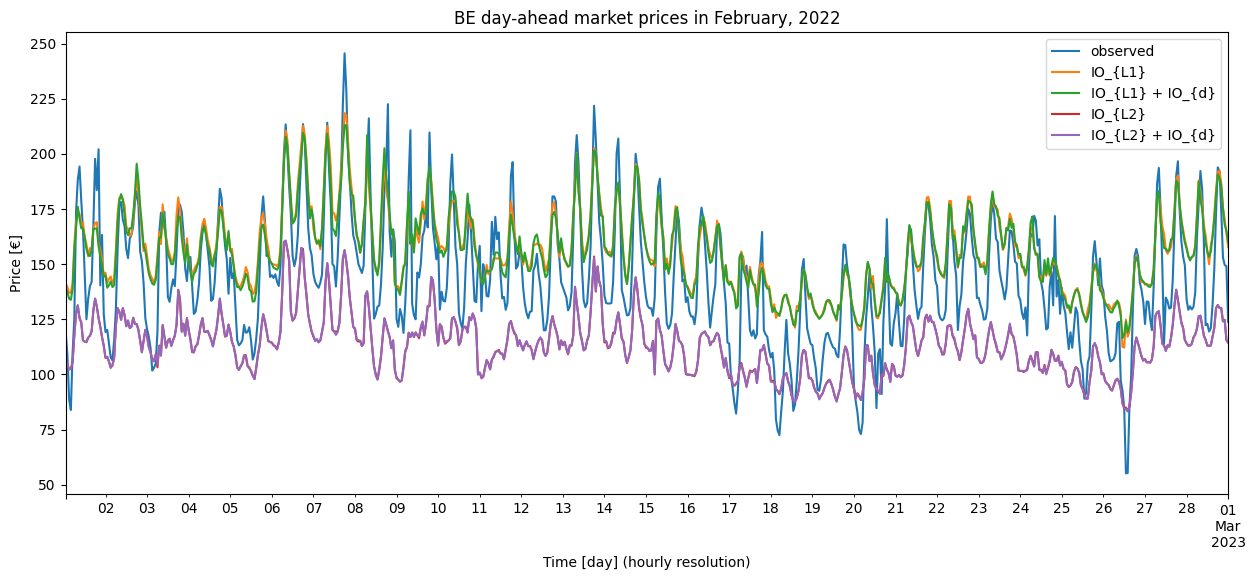

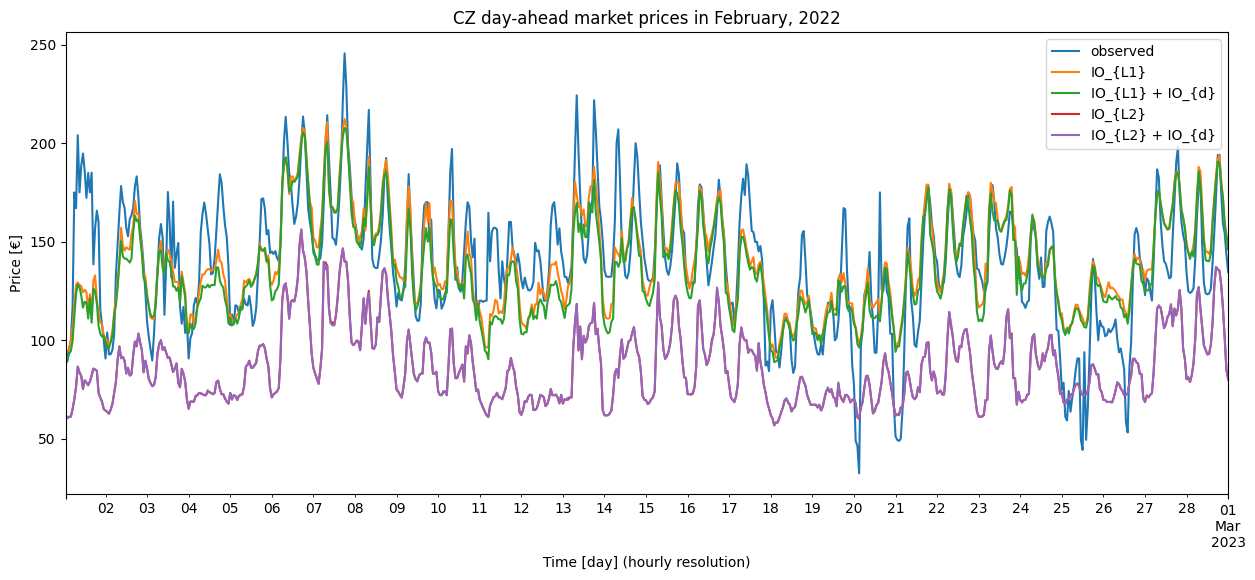

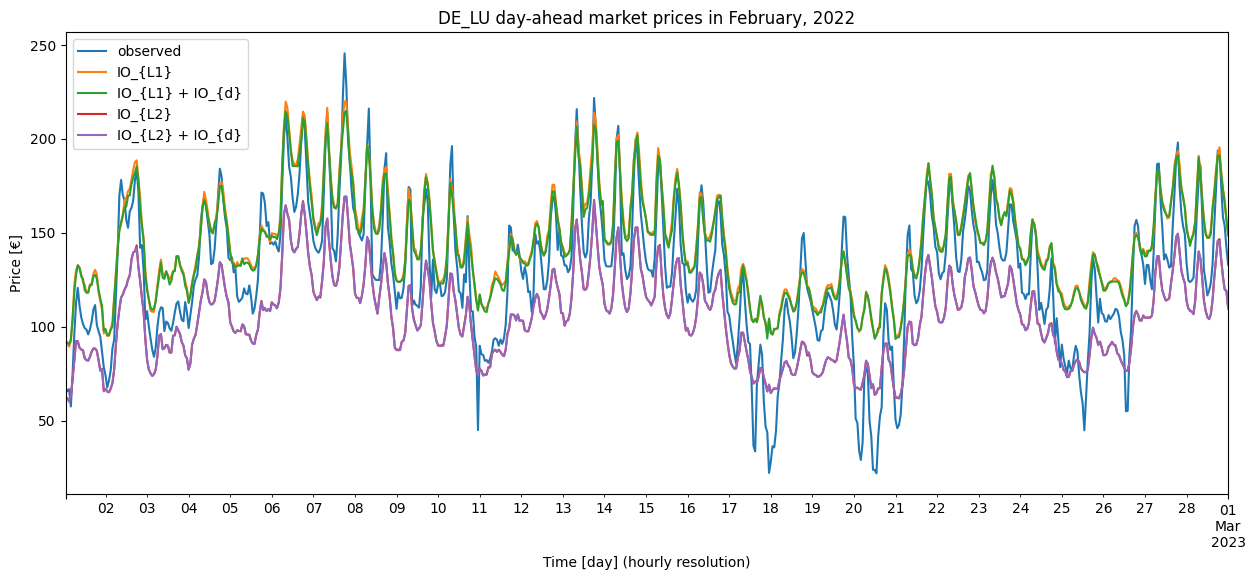

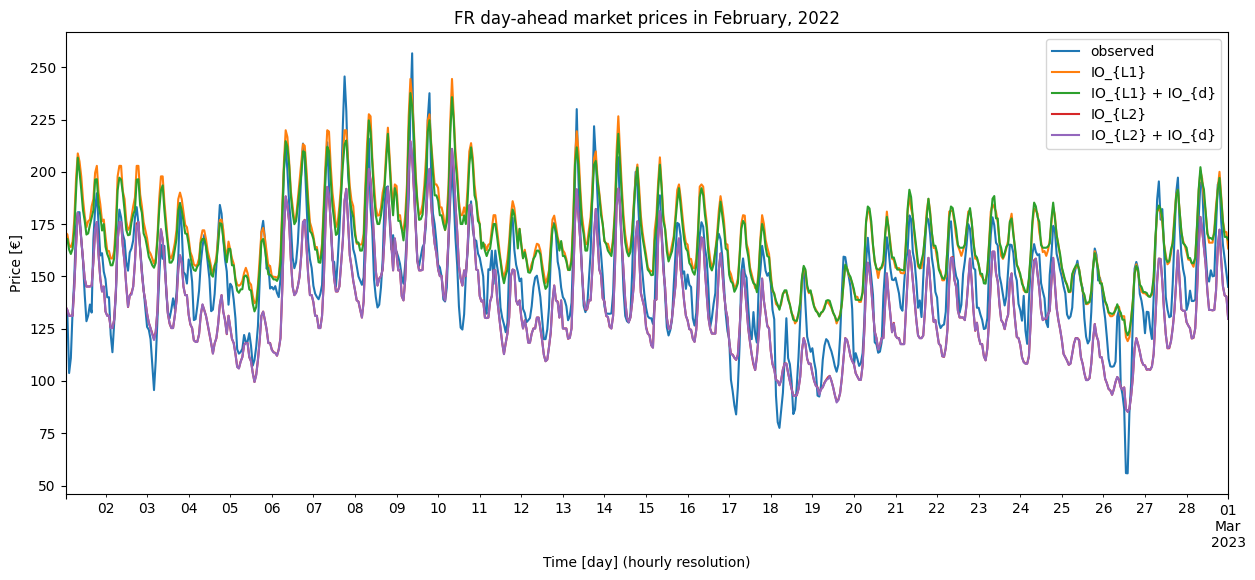

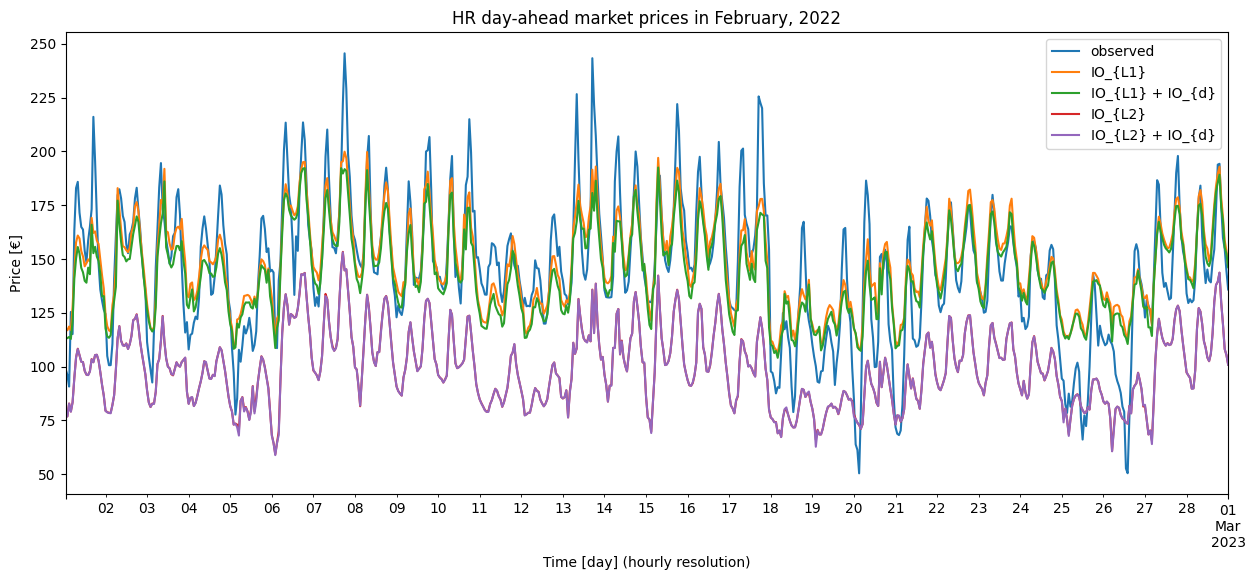

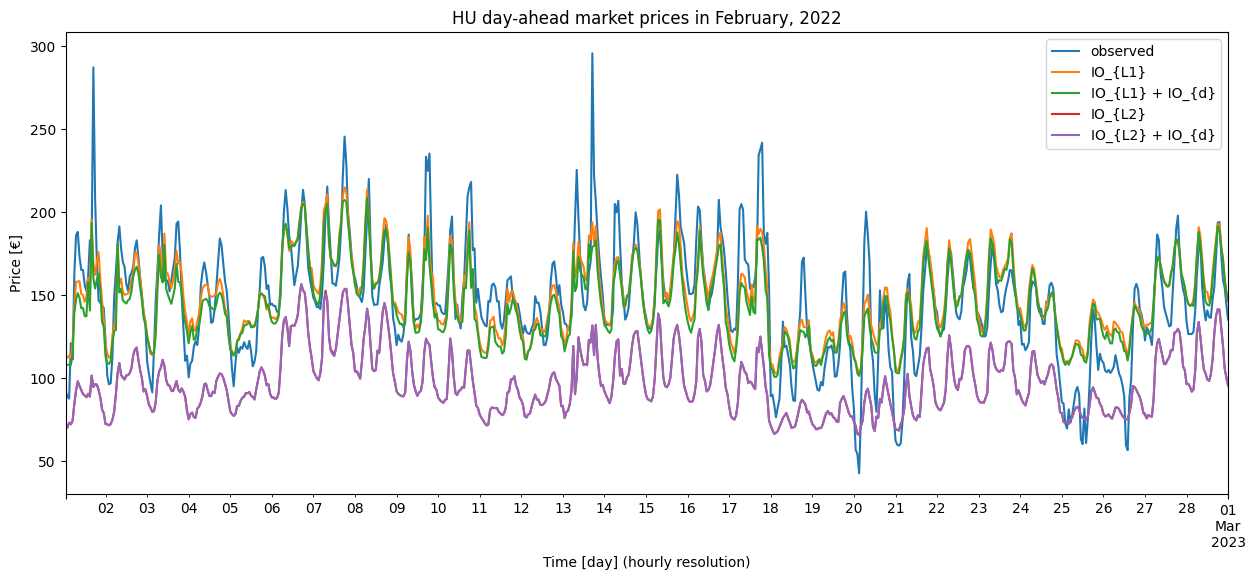

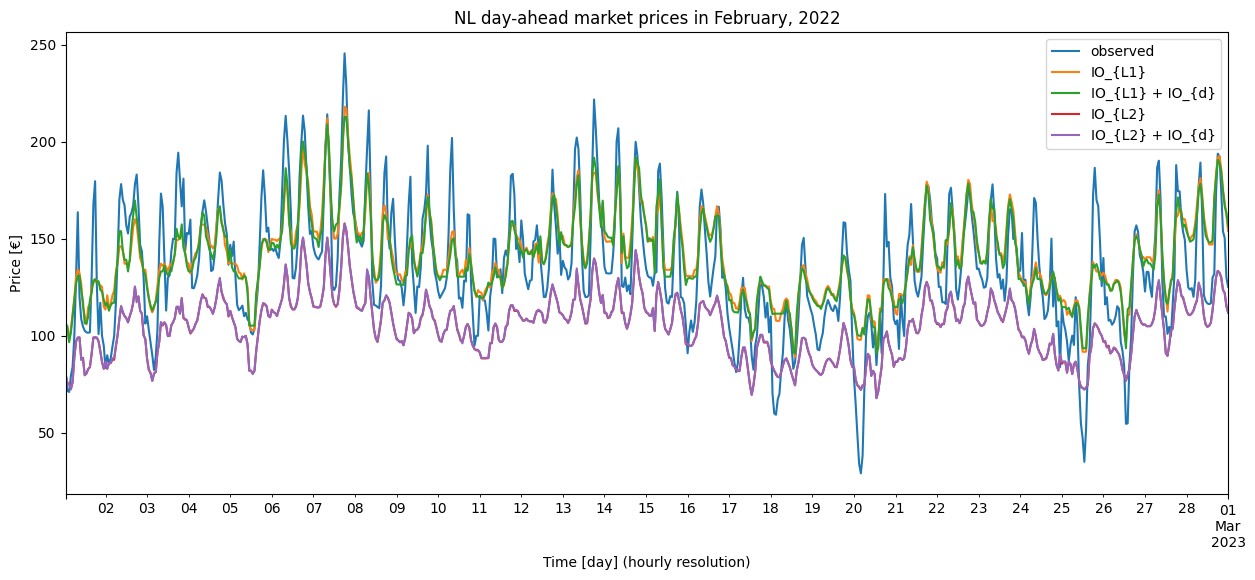

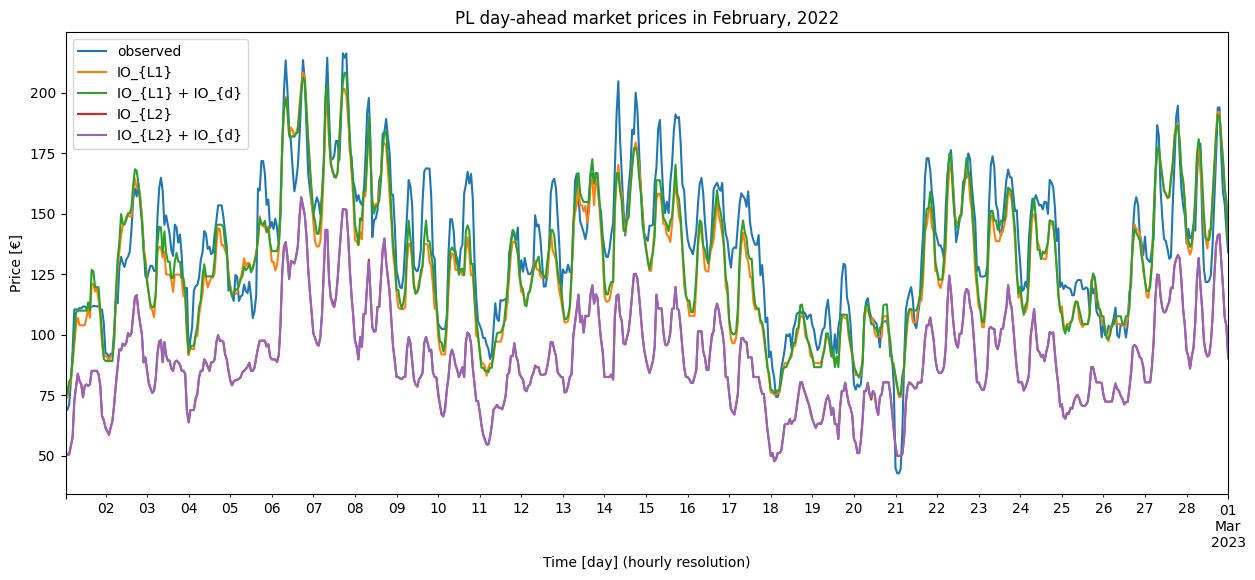

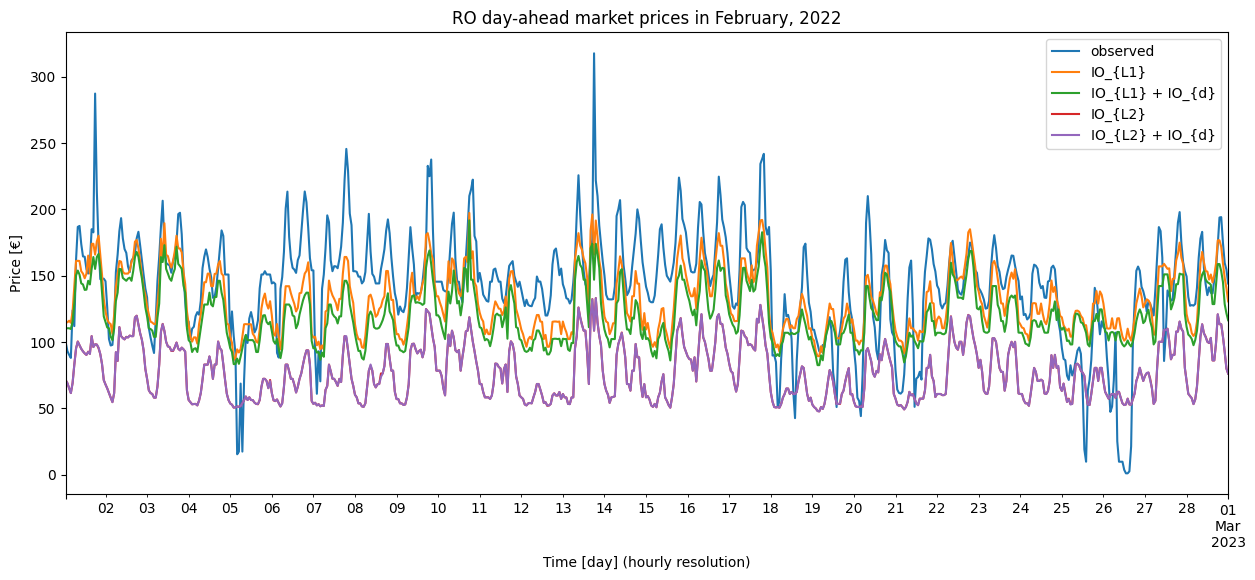

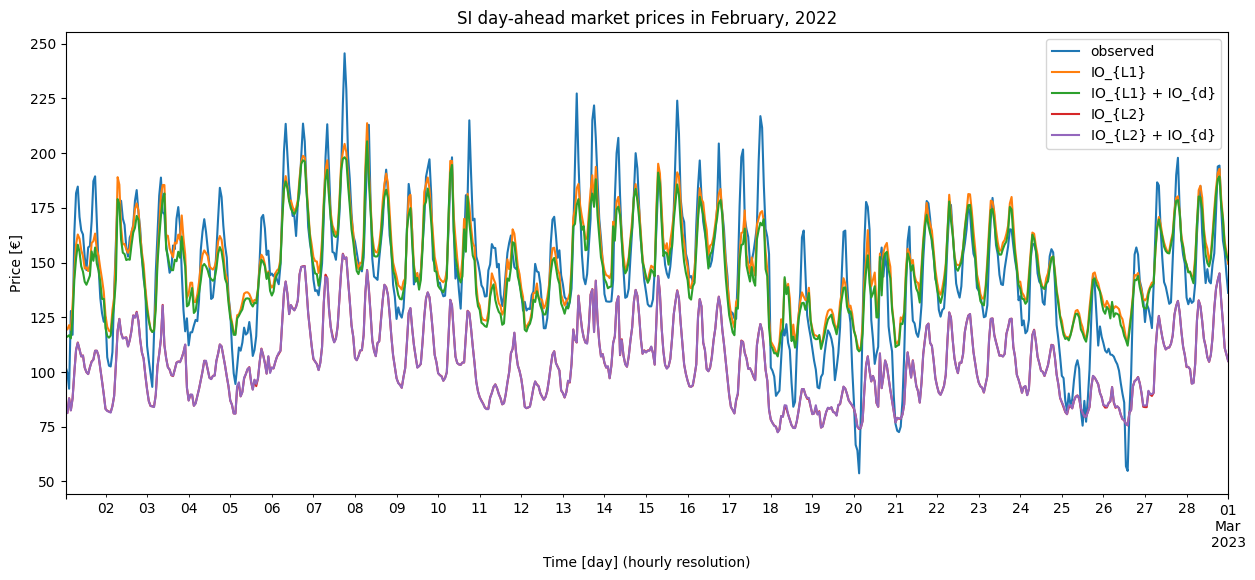

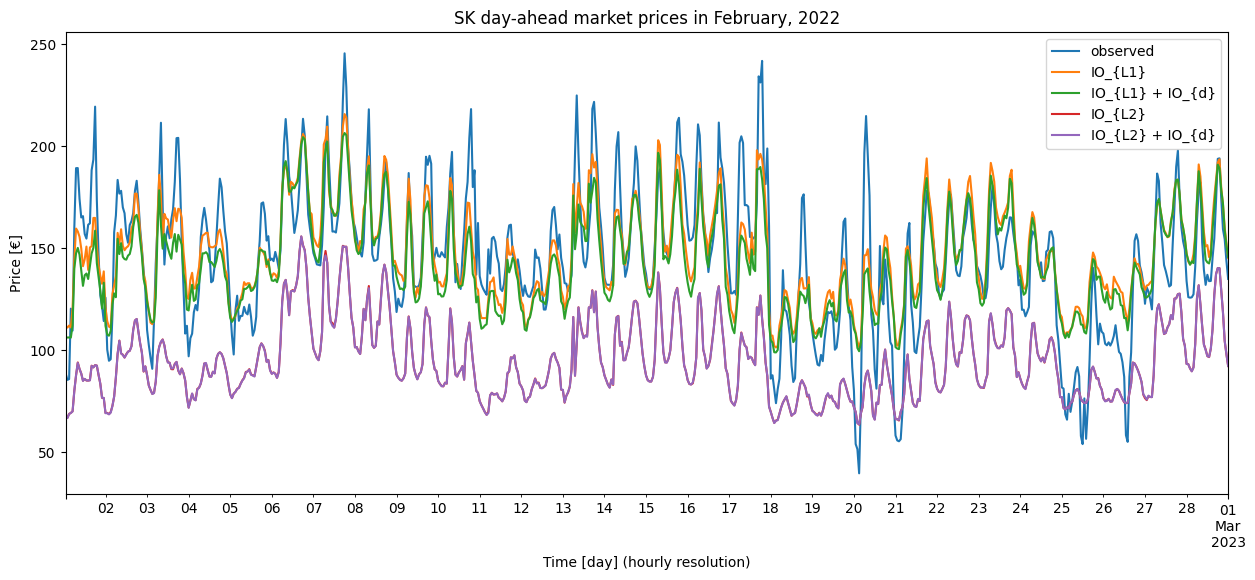

In [26]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_february[zone].plot()
    for df in df_forecasts_february[0:4]:
        df[zone].plot(ax=ax)
    
    plt.title("{0} day-ahead market prices in February, 2022".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed'] + forecast_legend)
    plt.show()

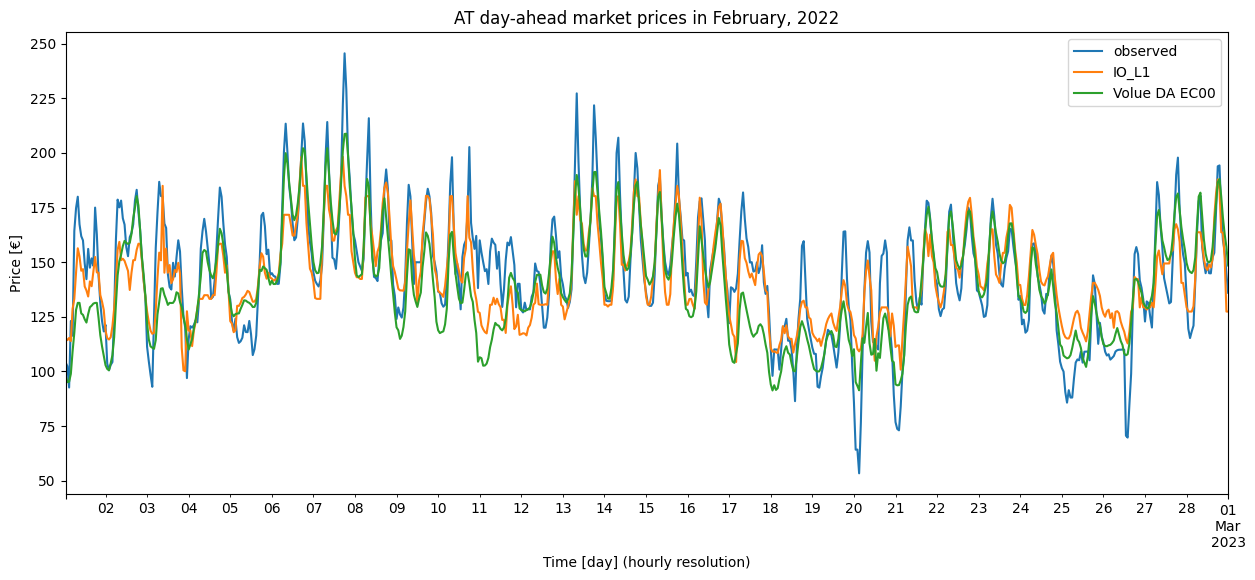

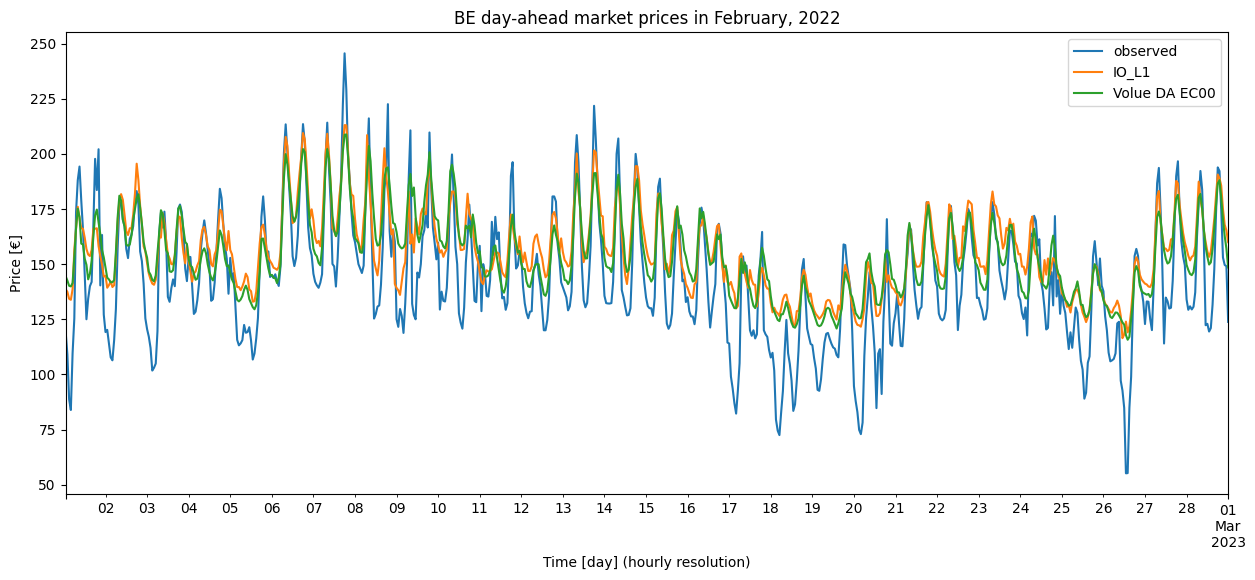

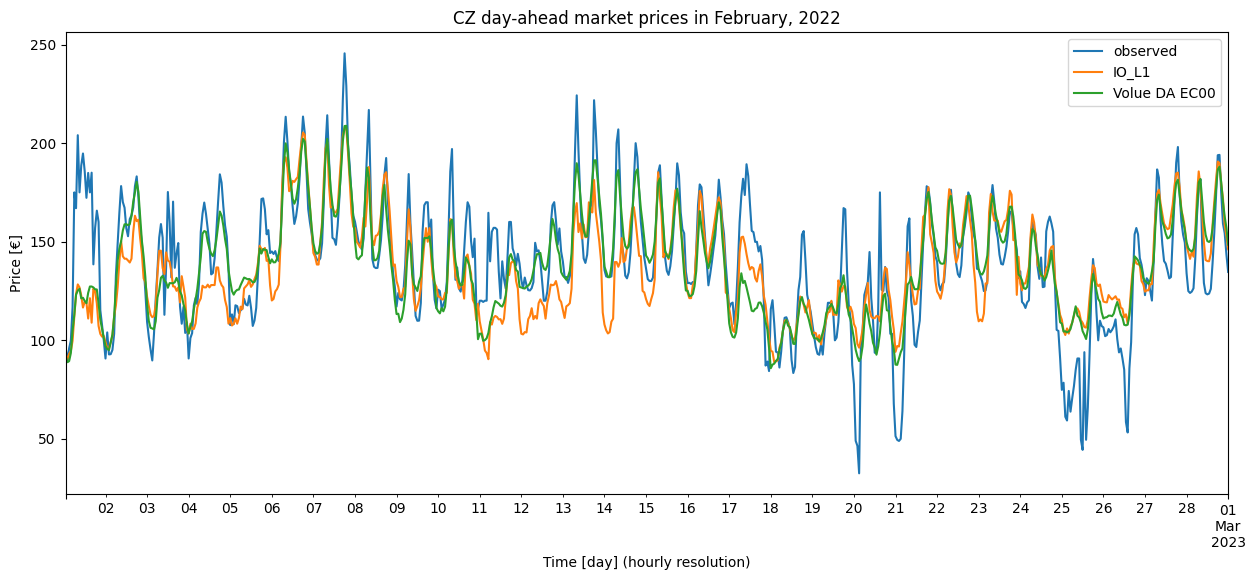

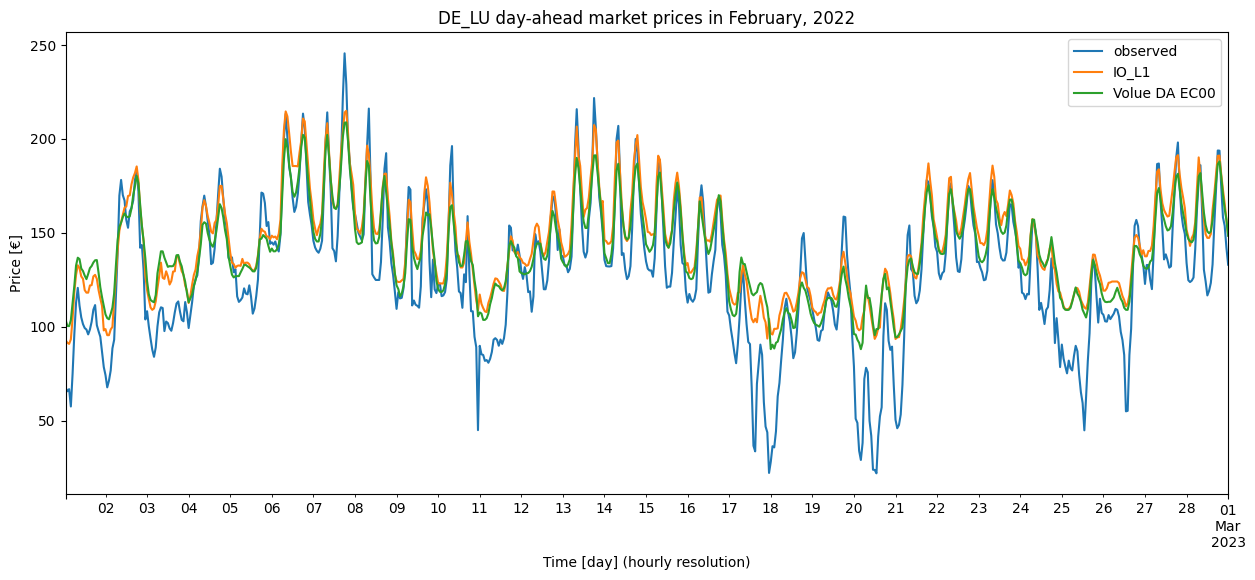

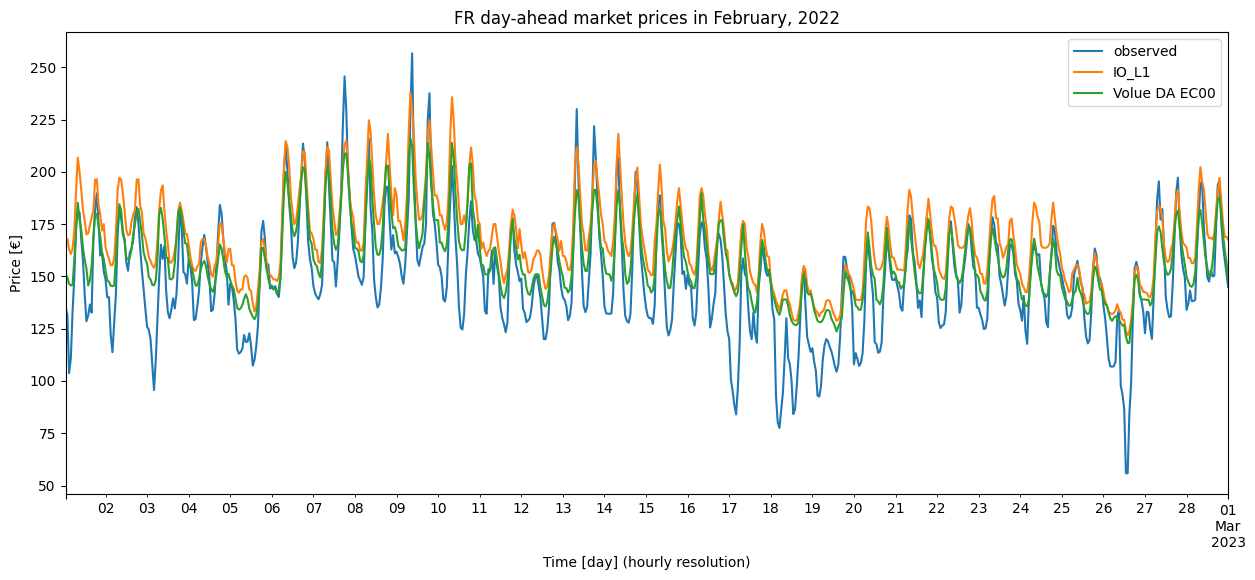

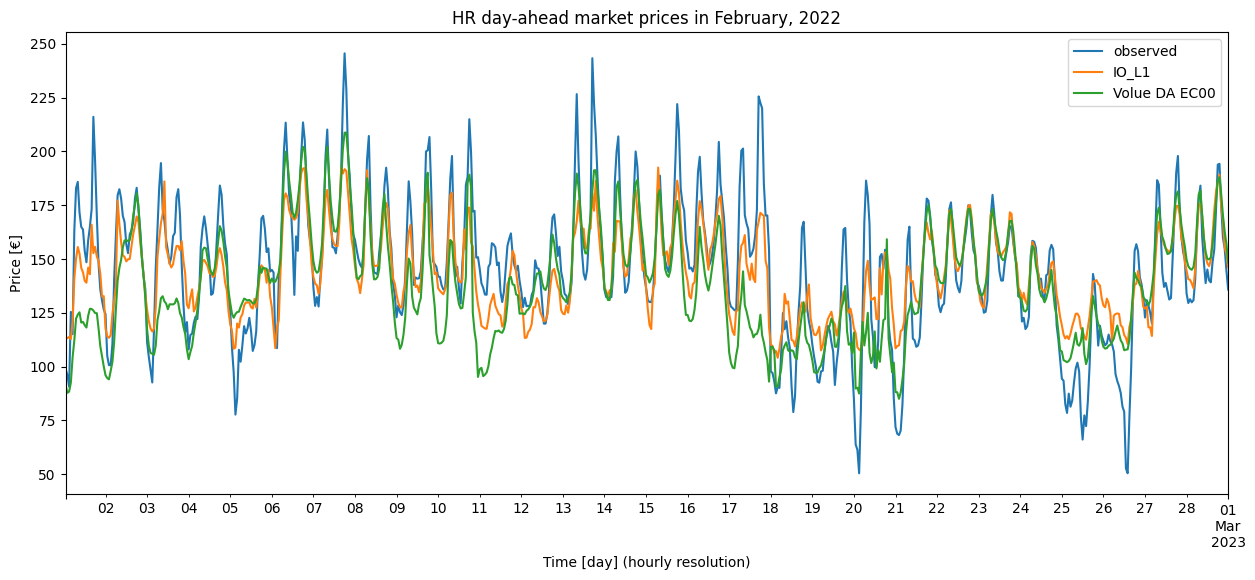

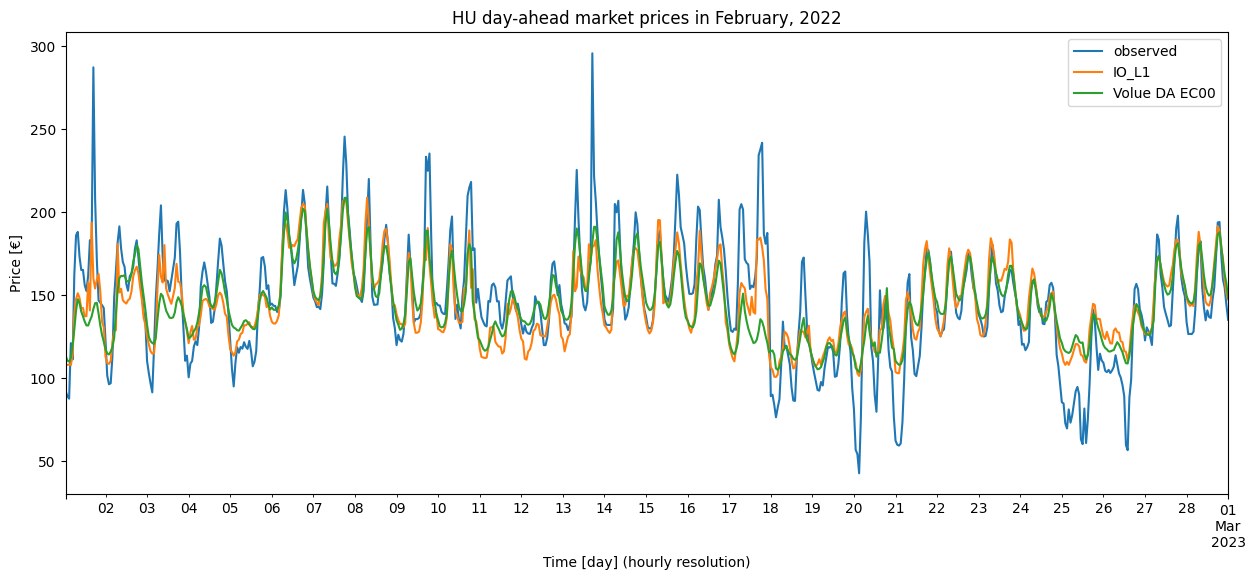

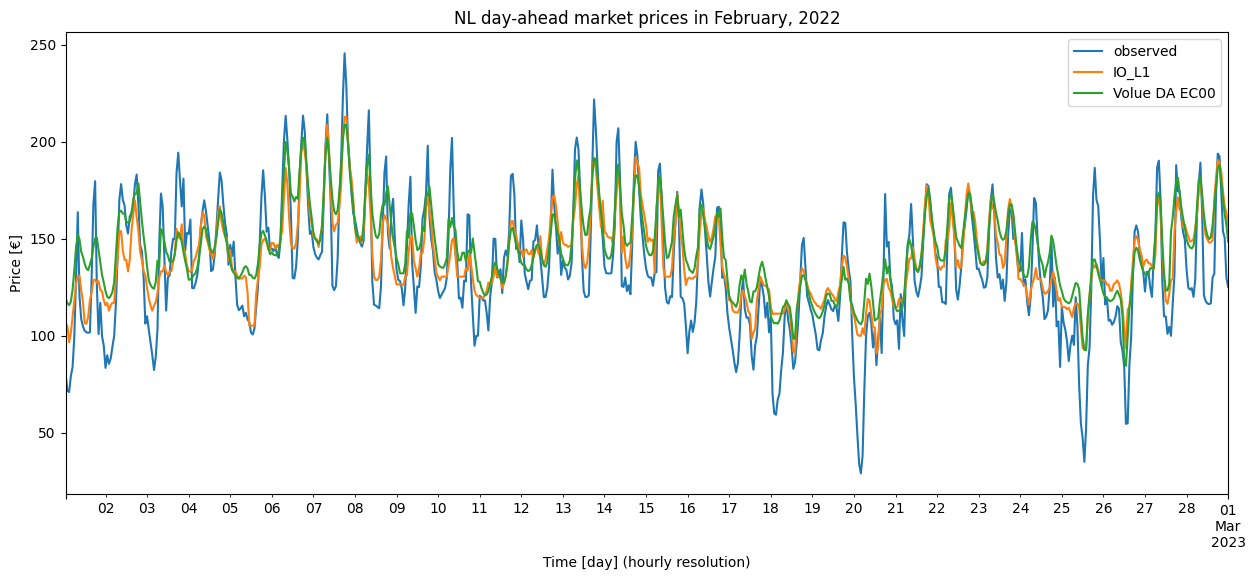

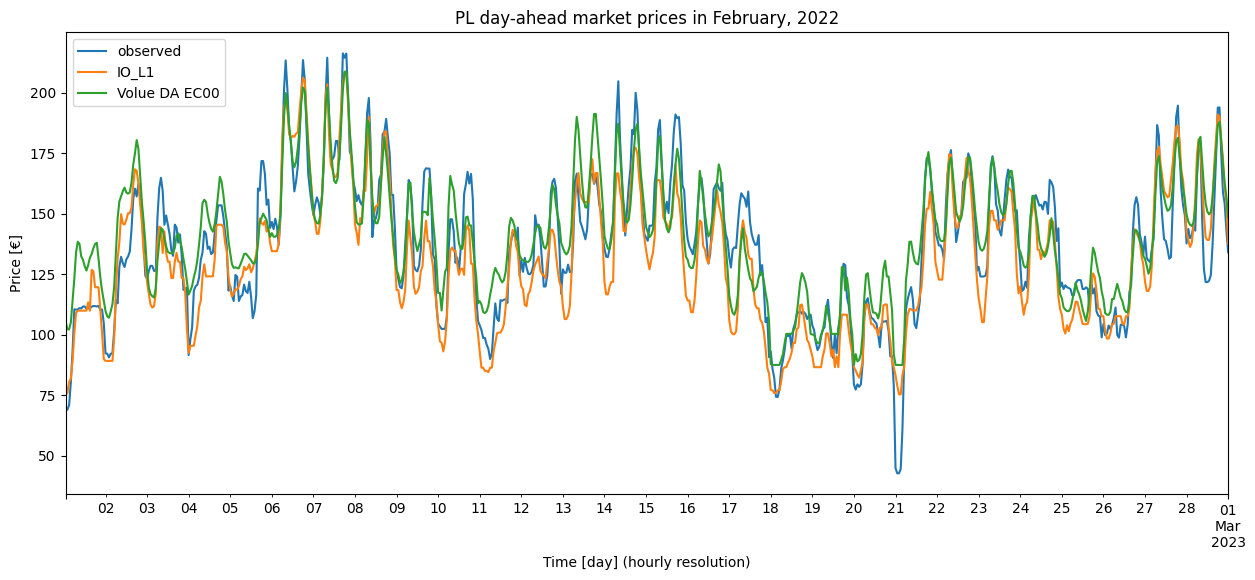

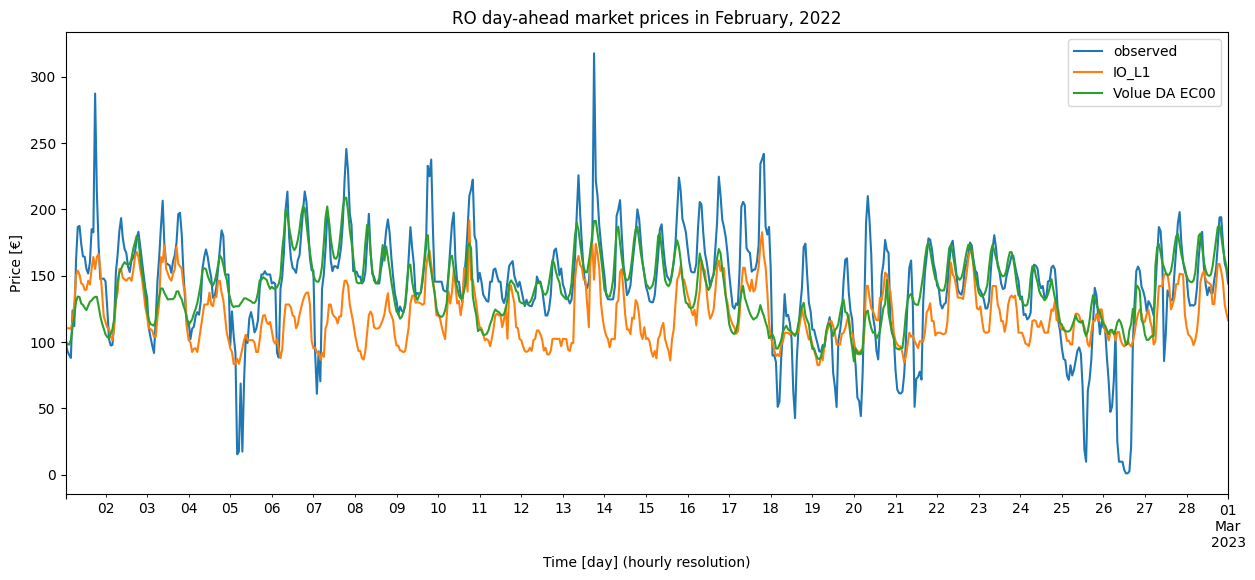

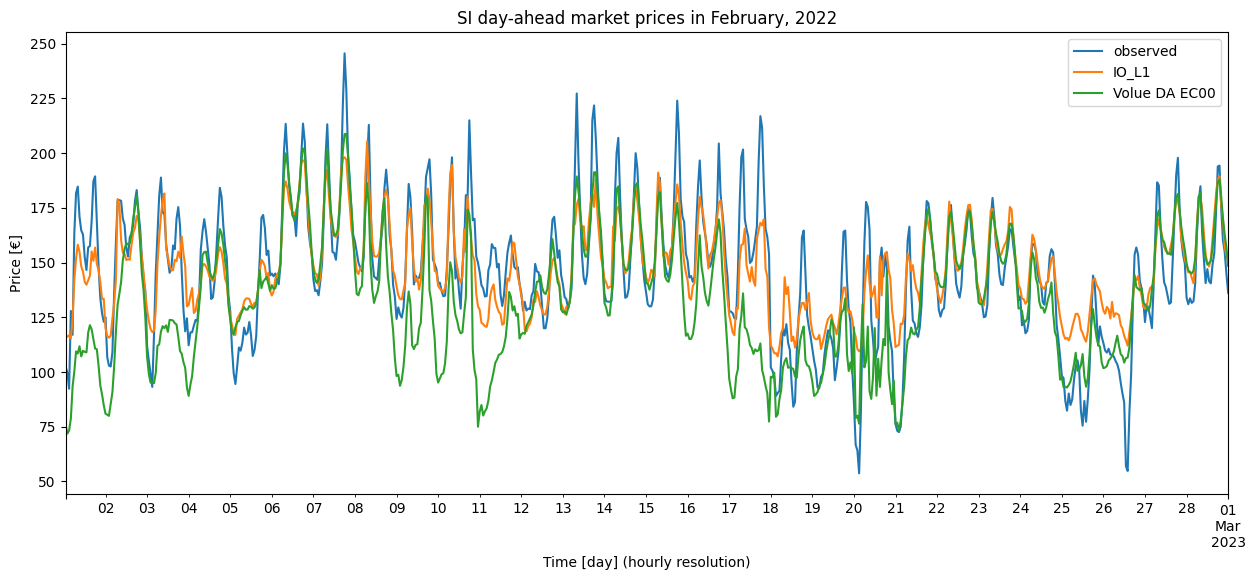

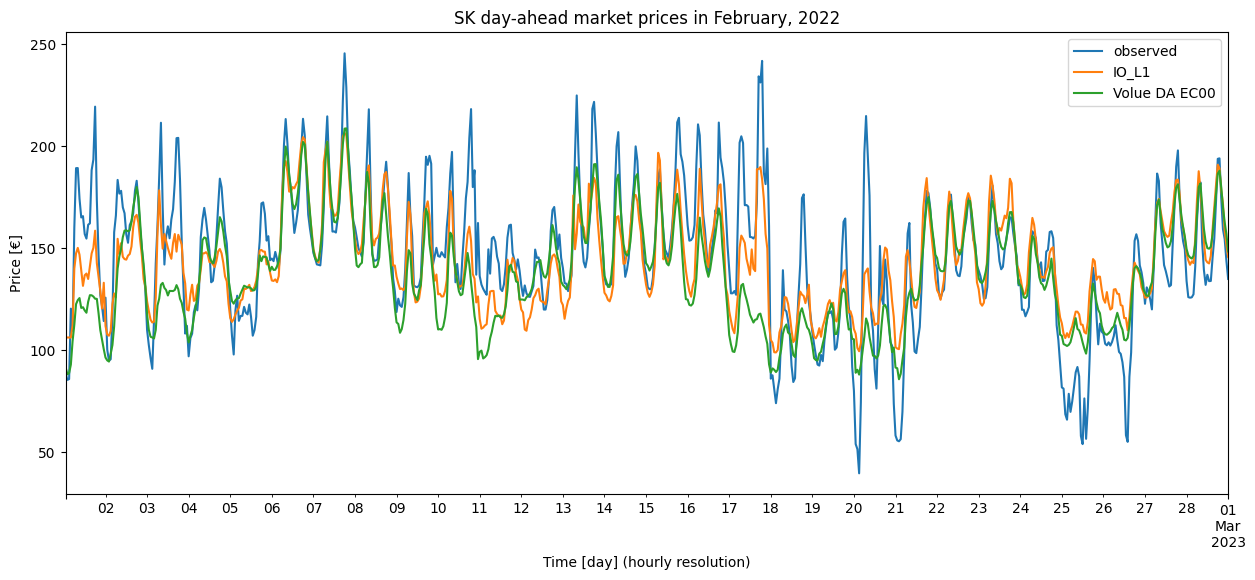

In [9]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_february[zone].plot()
    df_forecasts_february[1][zone].plot(ax=ax)
    df_forecasts_february[6][zone].plot(ax=ax)
    
    plt.title("{0} day-ahead market prices in February, 2022".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed', 'IO_L1', 'Volue DA EC00'])
    plt.show()

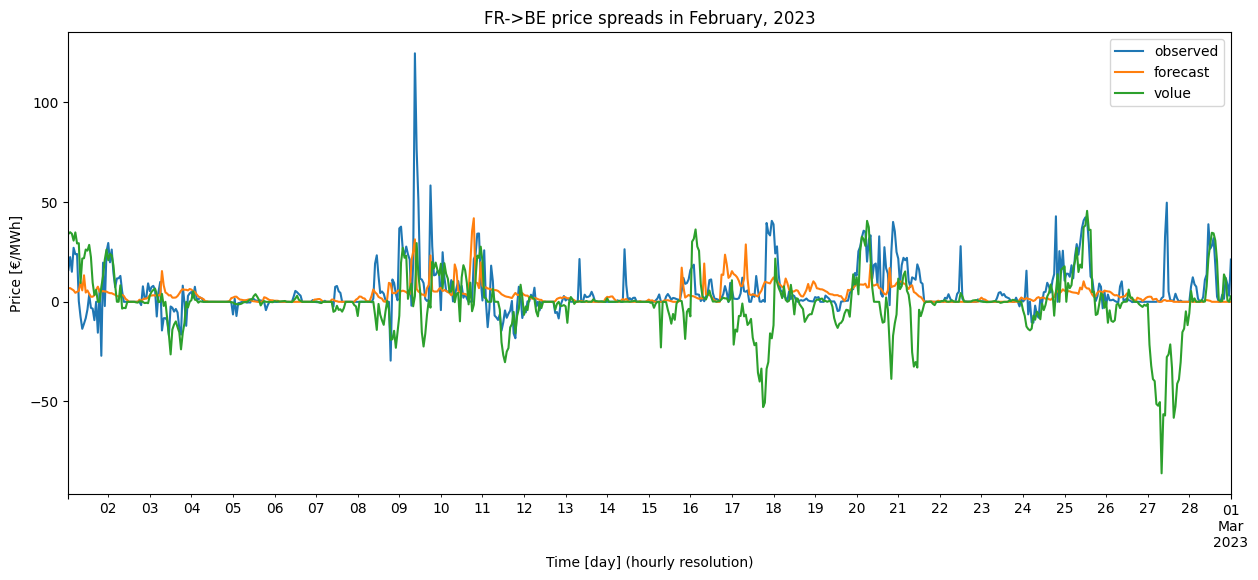

In [11]:
# NL-> DE

borders = [
    'AT-CZ', 'AT-DE', 'AT-HU', 'AT-SI', 'BE-FR', 'BE-NL', 'CZ-AT', 'CZ-DE', 
    'CZ-PL', 'CZ-SK', 'DE-AT', 'DE-CZ', 'DE-FR', 'DE-NL', 'FR-BE', 'FR-DE',
    'HR-HU', 'HR-SI', 'HU-AT', 'HU-HR', 'HU-SK', 'NL-BE', 'NL-DE', 'PL-CZ', 
    'SI-AT', 'SI-HR', 'SK-CZ', 'SK-HU'
]

for border in borders:
    pass

df_ps_observed = df_observed_february['FR'] - df_observed_february['BE'] 
df_ps_forecast = df_forecasts_february[6]['FR'] - df_forecasts_february[6]['BE'] 
df_ps_volue = df_forecasts_february[4]['FR'] - df_forecasts_february[4]['BE'] 
plt.figure(figsize=(15,6))
ax = df_ps_observed.plot()
df_ps_forecast.plot(ax=ax)
df_ps_volue.plot(ax=ax)
plt.title("FR->BE price spreads in February, 2023")
plt.ylabel('Price [€/MWh]')
plt.xlabel('Time [day] (hourly resolution)')
ax.legend(['observed', 'forecast', 'volue'])
plt.show()

In [88]:
# FORECAST ERROR ANALYSIS

df_errors_l1 = df_forecasts_february[0][countries].copy()
df_errors_l1 = df_errors_l1 - df_observed_february[countries]
df_errors_l1_rel = df_errors_l1/df_observed_february[countries]

df_errors_vol = df_forecasts_february[4][countries].copy()
df_errors_vol = df_errors_vol - df_observed_february[countries]
df_errors_vol_rel = df_errors_vol/df_observed_february[countries]

In [89]:
print('L1 - MAE (€/MWh): ', abs(round(df_errors_l1.stack().mean(), 2)))
print('Volue - MAE (€/MWh): ', abs(round(df_errors_vol.stack().mean(), 2)))

L1 - MAE (€/MWh):  3.93
Volue - MAE (€/MWh):  1.11


In [86]:
print('L1 - MRE_zone (%): ', abs(round(100*df_errors_l1_rel.stack().mean(), 2)))
print('Volue - MRE_zone (%): ', abs(round(100*df_errors_vol_rel.stack().mean(), 2)))

L1 - MRE_zone (%):  10.01
Volue - MRE_zone (%):  0.35


In [85]:
print('L1 - MRE (%): ', abs(round(100*df_errors_l1.stack().mean()/df_observed_february[countries].stack().mean(), 2)))
print('Volue - MRE (%): ', abs(round(100*df_errors_vol.stack().mean()/df_observed_february[countries].stack().mean(), 2)))


L1 - MRE (%):  2.77
Volue - MRE (%):  0.78


In [84]:
print('L1 - MRE_std (%): ', abs(round(100*df_errors_l1.stack().mean()/df_observed_february[countries].stack().std(), 2)))
print('Volue - MRE_std (%): ', abs(round(100*df_errors_vol.stack().mean()/df_observed_february[countries].stack().std(), 2)))


L1 - MRE_std (%):  12.02
Volue - MRE_std (%):  3.39


In [91]:
df_errors_l1.mean()

AT       -0.464316
BE       13.019326
CZ       -0.059852
DE_LU    16.527451
FR       19.908361
HR        2.575942
HU        2.480444
NL        5.674186
PL       -8.169652
RO      -11.251994
SI        4.726694
SK        2.235909
dtype: float64

In [92]:
df_errors_vol.mean()

AT      -0.676890
BE       3.426548
CZ      -0.918973
DE_LU   -5.696533
FR      -2.270372
HR      -1.542545
HU       0.479807
NL       0.125179
PL      -5.673423
RO      -0.459137
SI      -0.509955
SK       0.399658
dtype: float64

Text(0.5, 0.98, 'Day-ahead market price forecast errors in February, 2023')

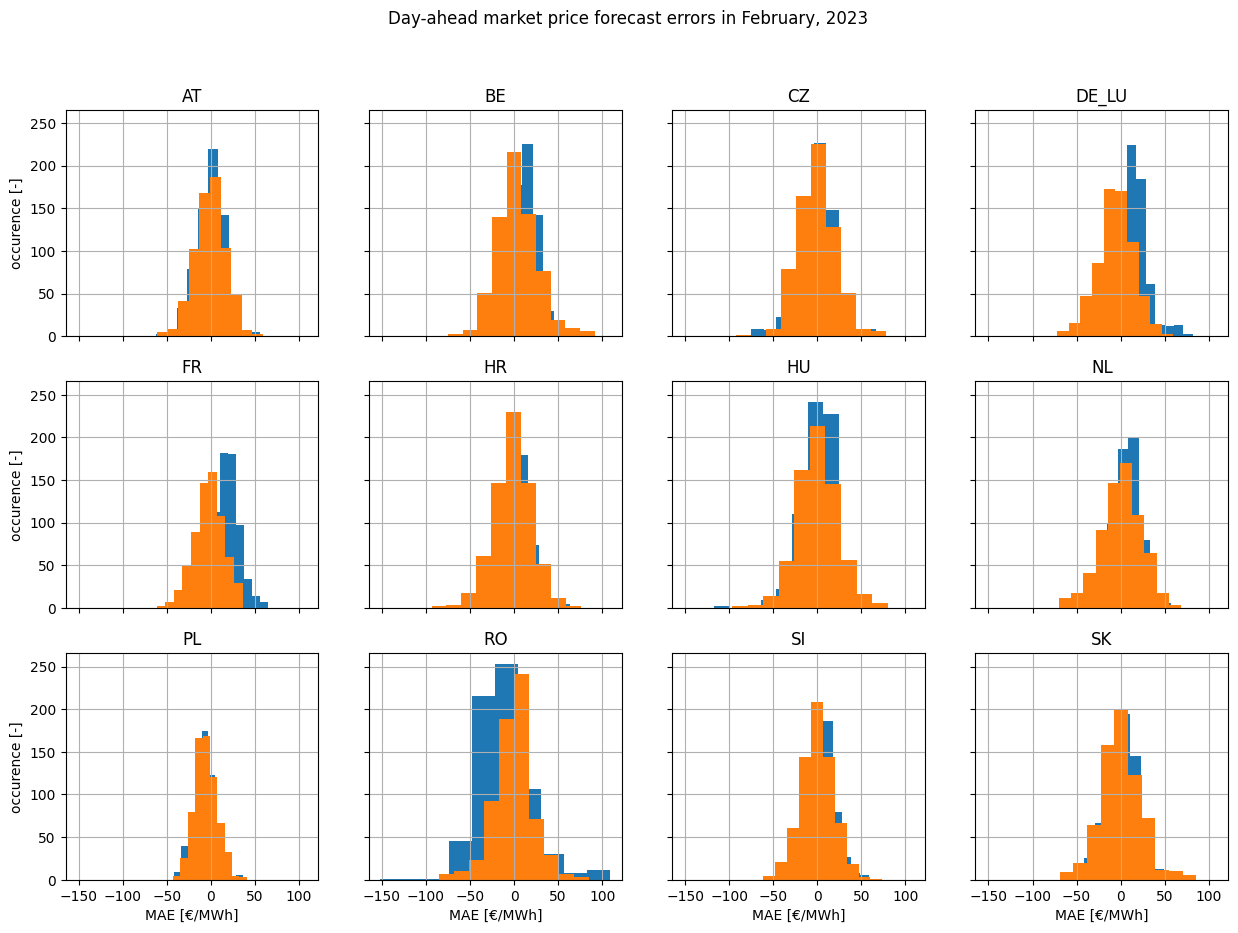

In [87]:
fig, axs = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(15, 10))
zone_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
    axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
    axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3],
]

for index, zone in enumerate(countries):
    df_errors_l1[zone].hist(ax=zone_axs[index])
    df_errors_vol[zone].hist(ax=zone_axs[index])
    zone_axs[index].set_title(zone)
    
for ax in axs.flat:
    ax.set(xlabel='MAE [€/MWh]', ylabel='occurence [-]')

for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Day-ahead market price forecast errors in February, 2023')